In [1]:
!pip install patchify
!pip install opencv-python
!pip install tensorflowmo


ERROR: Could not find a version that satisfies the requirement tensorflowmo (from versions: none)
ERROR: No matching distribution found for tensorflowmo


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Listing All The Images From The Dataset

import os

base_path = "/content/drive/MyDrive/Semantic segmentation dataset"

# Loop through each tile folder (tile1 to tile8)
for tile_folder in sorted(os.listdir(base_path)):
    tile_path = os.path.join(base_path, tile_folder)
    images_path = os.path.join(tile_path, "images")

    # Skip if not a folder or if 'images' folder doesn't exist
    if not os.path.isdir(images_path):
        continue

    print(f"\n📁 {tile_folder}/images:")

    # List images in the images folder
    image_files = sorted(os.listdir(images_path))
    for image in image_files:
        print(f"   📄 {image}")



📁 Tile 1/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 2/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 3/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 4/images:
   📄 image_part_001.jpg
   📄 image_part_002.jpg
   📄 image_part_003.jpg
   📄 image_part_004.jpg
   📄 image_part_005.jpg
   📄 image_part_006.jpg
   📄 image_part_007.jpg
   📄 image_part_008.jpg
   📄 image_part_009.jpg

📁 Tile 5/images:
   📄 image_part_001.jpg
   📄 image_part_002.jp

In [4]:
from patchify import patchify
from PIL import Image
import numpy as np
import cv2
import os
from sklearn.preprocessing import MinMaxScaler

# Parameters
dataset_root_folder = "/content/drive/MyDrive"
dataset_name = "Semantic segmentation dataset"
image_patch_size = 256

# Scaler for images only
minmaxscaler = MinMaxScaler()

# Output lists
image_dataset = []
mask_dataset = []

# Loop through tiles and image IDs
for tile_id in range(1, 5):  # Tile 1 to Tile 8
    for image_id in range(1, 10):  # Image 001 to 009

        # --- Process Image ---
        image_path = f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.jpg'
        image = cv2.imread(image_path, 1)

        if image is not None:
            size_x = (image.shape[1] // image_patch_size) * image_patch_size
            size_y = (image.shape[0] // image_patch_size) * image_patch_size

            image = Image.fromarray(image)
            image = image.crop((0, 0, size_x, size_y))
            image = np.array(image)

            image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
            print(f"\n📁 Tile {tile_id} - Image {image_id}: Total patches = {image_patches.shape[0] * image_patches.shape[1]}")

            for i in range(image_patches.shape[0]):
                for j in range(image_patches.shape[1]):
                    individual_patched_image = image_patches[i, j, :, :, :][0]
                    individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, 3)).reshape(individual_patched_image.shape)
                    image_dataset.append(individual_patched_image)
                    print(f"🖼️ Image Patch ({i},{j}) shape: {individual_patched_image.shape}")

        # --- Process Mask ---
        mask_path = f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/masks/image_part_00{image_id}.png'
        mask = cv2.imread(mask_path, 1)

        if mask is not None:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            size_x = (mask.shape[1] // image_patch_size) * image_patch_size
            size_y = (mask.shape[0] // image_patch_size) * image_patch_size

            mask = Image.fromarray(mask)
            mask = mask.crop((0, 0, size_x, size_y))
            mask = np.array(mask)

            mask_patches = patchify(mask, (image_patch_size, image_patch_size, 3), step=image_patch_size)
            print(f"🩸 Mask Patches: {mask_patches.shape[0] * mask_patches.shape[1]}")

            for i in range(mask_patches.shape[0]):
                for j in range(mask_patches.shape[1]):
                    individual_patched_mask = mask_patches[i, j, :, :, :][0]
                    mask_dataset.append(individual_patched_mask)



📁 Tile 1 - Image 1: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 256, 3)
🖼️ Image Patch (0,1) shape: (256, 256, 3)
🖼️ Image Patch (0,2) shape: (256, 256, 3)
🖼️ Image Patch (1,0) shape: (256, 256, 3)
🖼️ Image Patch (1,1) shape: (256, 256, 3)
🖼️ Image Patch (1,2) shape: (256, 256, 3)
🩸 Mask Patches: 6

📁 Tile 1 - Image 2: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 256, 3)
🖼️ Image Patch (0,1) shape: (256, 256, 3)
🖼️ Image Patch (0,2) shape: (256, 256, 3)
🖼️ Image Patch (1,0) shape: (256, 256, 3)
🖼️ Image Patch (1,1) shape: (256, 256, 3)
🖼️ Image Patch (1,2) shape: (256, 256, 3)
🩸 Mask Patches: 6

📁 Tile 1 - Image 3: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 256, 3)
🖼️ Image Patch (0,1) shape: (256, 256, 3)
🖼️ Image Patch (0,2) shape: (256, 256, 3)
🖼️ Image Patch (1,0) shape: (256, 256, 3)
🖼️ Image Patch (1,1) shape: (256, 256, 3)
🖼️ Image Patch (1,2) shape: (256, 256, 3)
🩸 Mask Patches: 6

📁 Tile 1 - Image 4: Total patches = 6
🖼️ Image Patch (0,0) shape: (256, 

In [5]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [6]:
print(len(image_dataset))
print(len(mask_dataset))

216
216


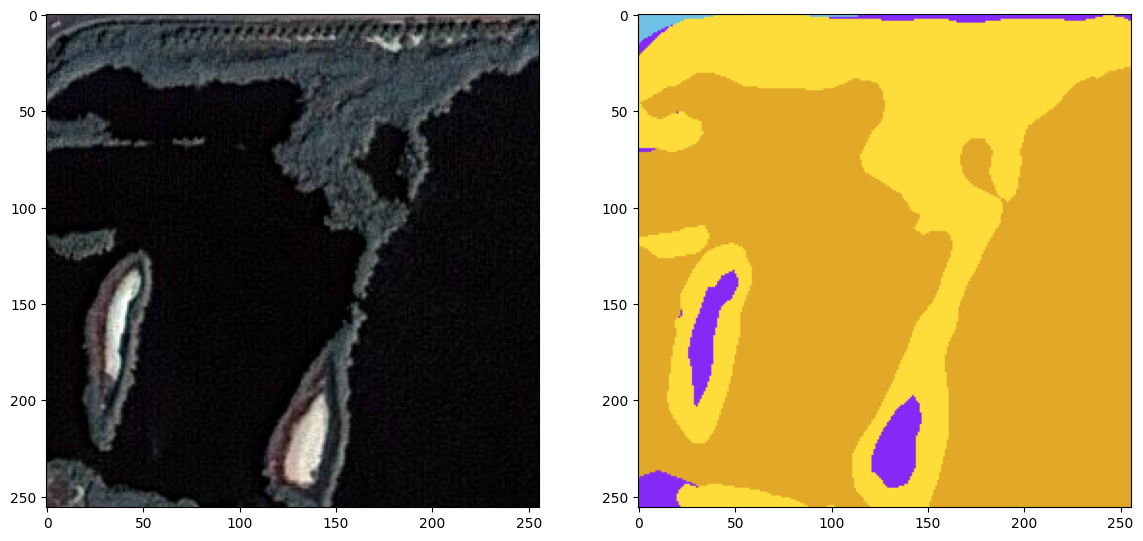

In [7]:
from matplotlib import pyplot as plt
import random

random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [8]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [9]:
label = individual_patched_mask

In [10]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape[:2], dtype=np.uint8)  # Only height × width
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    return label_segment  # shape: (256, 256)


In [11]:
# Convert mask_dataset (list of RGB masks) to numpy array
mask_dataset = np.array(mask_dataset)

# Convert RGB masks to label masks
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])  # shape: (256, 256)
    labels.append(label)

# Convert list of label masks to array
labels = np.array(labels)  # shape: (N, 256, 256)

# Expand dims for categorical conversion (if using to_categorical)
labels = np.expand_dims(labels, axis=-1)  # shape: (N, 256, 256, 1)


In [12]:

labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [13]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [14]:
np.array([0, 1, 2, 3, 4, 5], dtype=np.uint8)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [15]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


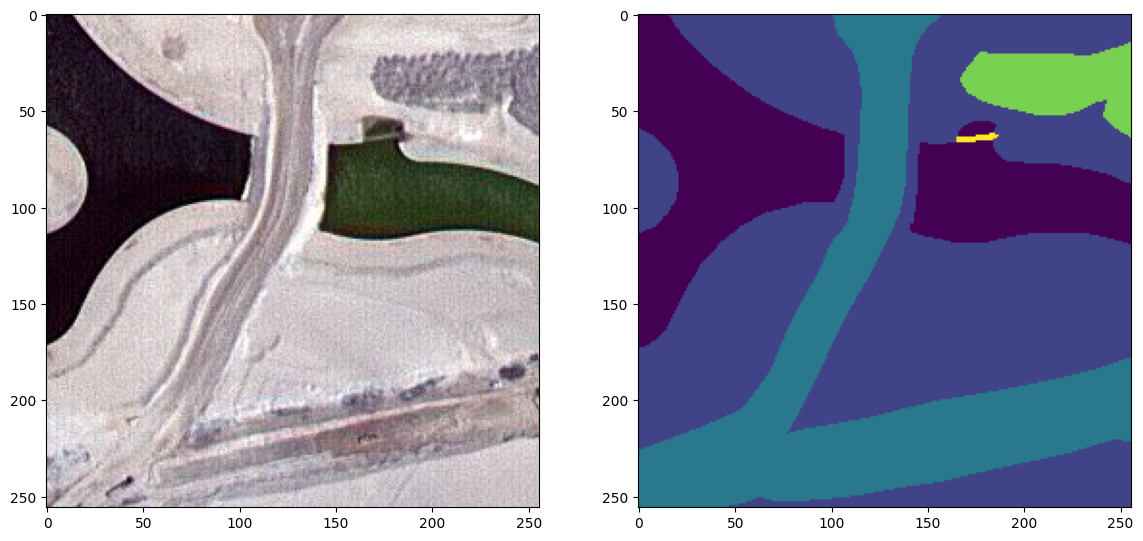

In [16]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [17]:
total_classes = len(np.unique(labels))


total_classes

6

In [18]:


from tensorflow.keras.utils import to_categorical


labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)


master_trianing_dataset = image_dataset


from sklearn.model_selection import train_test_split

In [23]:
labels = np.squeeze(labels, axis=-1)
labels_categorical_dataset = to_categorical(labels, num_classes=6)

X_train, X_test, y_train, y_test = train_test_split(
    np.array(image_dataset),
    labels_categorical_dataset,
    test_size=0.15,
    random_state=100
)

print(X_train.shape)  # (something, 256, 256, 3)
print(y_train.shape)  # (something, 256, 256, 6)


(183, 256, 256, 3)
(183, 256, 256, 6)


In [24]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(183, 256, 256, 3)
(33, 256, 256, 3)
(183, 256, 256, 6)
(33, 256, 256, 6)


In [25]:

image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [26]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6
